# Financial Data Analysis Pipeline: From API to Automated Insights

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────    
📘 **Author:** Teslim Uthman Adeyanju  
📫 **Email:** [info@adeyanjuteslim.co.uk](mailto:info@adeyanjuteslim.co.uk)  
🔗 **LinkedIn:** [linkedin.com/in/adeyanjuteslimuthman](https://www.linkedin.com/in/adeyanjuteslimuthman)  
🌐 **Website & Blog:** [adeyanjuteslim.co.uk](https://adeyanjuteslim.co.uk)  
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────    


In [16]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

import matplotlib.pyplot as plt
import seaborn as sns

# 📚 1.0 INTRODUCTION


<div style="font-family: Avenir, sans-serif; font-size: 16px; line-height: 1.6; color: white; background-color: #333; padding: 10px; border-radius: 5px;">
This section provides an overview of the dataset and the problem we are trying to solve. We will also discuss the data overview, project objective, methodology and the tools (libaries) we will use to solve the problem.

</div>

## 🔍 1.1 GDP Overview
____

The Real Potential GDP (GDPPOT) dataset from the Federal Reserve Economic Data (FRED) provides a comprehensive view of the U.S. economy's potential output. This dataset is crucial for understanding economic growth, inflation, and overall economic health. By analyzing GDPPOT, policymakers and economists can better assess the economy's performance relative to its potential, identify output gaps, and make informed decisions to promote sustainable growth.

This data will cover 70 years of economic data, from 1955 to 2025, and will be used to analyze the trends in the U.S. economy's potential output over time. The dataset includes quarterly data points, allowing for a detailed examination of economic fluctuations and long-term trends.

In [5]:
# Setting the Date 
end = date.today()  
print(f'Year = {end.year}; month= {end.month}; day={end.day}')  

start = date(year=end.year-70, 
             month=end.month, 
             day=end.day)  

print(f'Period for indexes: {start} to {end} ')  

Year = 2025; month= 6; day=5
Period for indexes: 1955-06-05 to 2025-06-05 


### Real Potential GDP (GDPPOT) Analysis — U.S. FRED Data

The data source for this analysis is the Federal Reserve Economic Data (FRED) database, which provides a wealth of economic data. The GDPPOT dataset specifically focuses on the Real Potential GDP, which is a measure of the economy's maximum sustainable output, adjusted for inflation.

In [6]:
# Download GDPPOT data from FRED
gdppot = pdr.DataReader("GDPPOT", "fred", start=start)

In [8]:
gdppot.head()

,GDPPOT
DATE,
1955-07-01,2999.764844
1955-10-01,3019.152595
1956-01-01,3038.588138
1956-04-01,3057.448970
1956-07-01,3077.140146


The calculation will focused on the Real Potential GDP (GDPPOT) data, which is a key indicator of the economy's potential output. The analysis will involve calculating the growth rate of GDPPOT, identifying trends, and visualizing the data to provide insights into the U.S. economy's performance.

### Growth Rate Calculations

**Year-over-Year (YoY) Growth Rate**: Measures the percentage change in GDP from one year to the next.

In [9]:
gdppot['gdppot_us_yoy'] = gdppot['GDPPOT'] / gdppot['GDPPOT'].shift(4) - 1


In [10]:
gdppot['gdppot_us_yoy']

DATE
1955-07-01         NaN
1955-10-01         NaN
1956-01-01         NaN
1956-04-01         NaN
1956-07-01    0.025794
                ...   
2024-04-01    0.023139
2024-07-01    0.023223
2024-10-01    0.023249
2025-01-01    0.023113
2025-04-01    0.023029
Name: gdppot_us_yoy, Length: 280, dtype: float64

**Quarter-over-Quarter (QoQ) Growth Rate**: Measures the percentage change in GDP from one quarter to the next.

In [11]:
gdppot['gdppot_us_qoq'] = gdppot['GDPPOT'] / gdppot['GDPPOT'].shift(1) - 1


In [12]:
gdppot['gdppot_us_qoq']

DATE
1955-07-01         NaN
1955-10-01    0.006463
1956-01-01    0.006437
1956-04-01    0.006207
1956-07-01    0.006440
                ...   
2024-04-01    0.005799
2024-07-01    0.005753
2024-10-01    0.005745
2025-01-01    0.005619
2025-04-01    0.005716
Name: gdppot_us_qoq, Length: 280, dtype: float64

In [13]:
# View recent data
gdppot.tail(15)

,GDPPOT,gdppot_us_yoy,gdppot_us_qoq
DATE,,,
2021-10-01,21606.08076,0.020390,0.005260
2022-01-01,21722.02480,0.020882,0.005366
2022-04-01,21840.56636,0.021403,0.005457
2022-07-01,21961.53508,0.021799,0.005539
2022-10-01,22084.92536,0.022162,0.005618
2023-01-01,22208.24254,0.022384,0.005584
2023-04-01,22333.11239,0.022552,0.005623
2023-07-01,22459.74068,0.022685,0.005670
2023-10-01,22588.18459,0.022787,0.005719


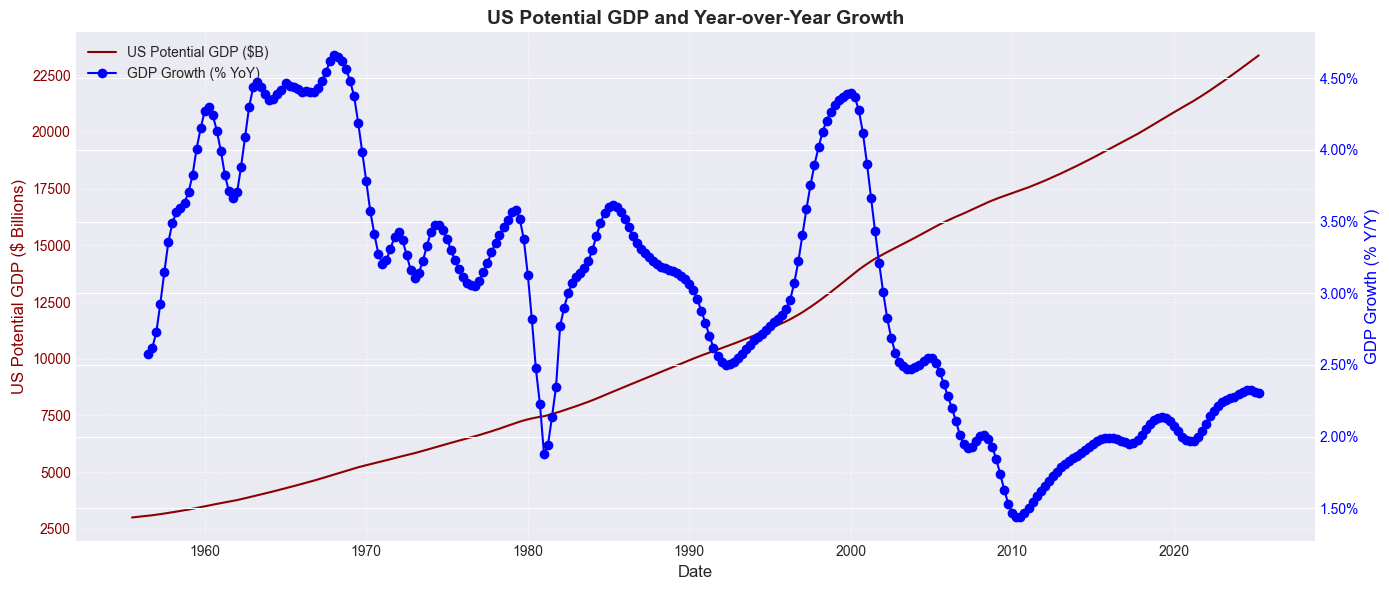

In [54]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot US Potential GDP on the left y-axis
ax1.plot(gdppot.index, gdppot.GDPPOT, color='darkred', label='US Potential GDP ($B)')
ax1.set_ylabel('US Potential GDP ($ Billions)', color='darkred', fontsize=12)
ax1.tick_params(axis='y', labelcolor='darkred')

# Create secondary y-axis for YoY growth (%)
ax2 = ax1.twinx()
ax2.plot(gdppot.index, gdppot.gdppot_us_yoy, color='blue', marker='o', label='GDP Growth (% YoY)')
ax2.set_ylabel('GDP Growth (% Y/Y)', color='blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Labels and grid
ax1.set_xlabel('Date', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)

# Title
plt.title('US Potential GDP and Year-over-Year Growth', fontsize=14, fontweight='bold')

# Combine and display legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Show plot
plt.tight_layout()
plt.show()


## 🔍 1.1 Inflation Overview
____

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import datetime, timedelta


**Fetch Core CPI Data from FRED**: 

We will retrieve the Core Consumer Price Index (CPI) data from the FRED database. The Core CPI excludes food and energy prices, providing a clearer view of underlying inflation trends. The Core CPI is a key indicator of inflation, as it reflects the price changes of a basket of goods and services that consumers typically purchase.

In [43]:
def get_core_cpi_data(start=None, end=None):
    if start is None:
        start = datetime.today() - timedelta(days=365*10)  # Default: last 10 years

    # Download Core CPI data (CPILFESL)
    df = web.DataReader("CPILFESL", "fred", start, end)
    df.rename(columns={"CPILFESL": "core_cpi_index"}, inplace=True)
    
    # Calculate YoY and MoM growth
    df["yoy_growth"] = df["core_cpi_index"].pct_change(12) * 100
    df["mom_growth"] = df["core_cpi_index"].pct_change(1) * 100
    df["mom_annualized"] = ((1 + df["mom_growth"] / 100) ** 12 - 1) * 100

    return df

# Call the function and store the result in a variable
df_cpi = get_core_cpi_data()

In [48]:
from datetime import date, datetime, timedelta
import pandas_datareader.data as web
import pandas as pd

# Step 1: Set the date range
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')  

start = date(year=end.year - 70, month=end.month, day=end.day)  
print(f'Period for indexes: {start} to {end}')  

# Step 2: Define the function (same as before)
def get_core_cpi_data(start=None, end=None):
    if start is None:
        start = datetime.today() - timedelta(days=365*10)  # Default: last 10 years

    df = web.DataReader("CPILFESL", "fred", start, end)
    df.rename(columns={"CPILFESL": "core_cpi_index"}, inplace=True)

    df["yoy_growth"] = df["core_cpi_index"].pct_change(12) * 100
    df["mom_growth"] = df["core_cpi_index"].pct_change(1) * 100
    df["mom_annualized"] = ((1 + df["mom_growth"] / 100) ** 12 - 1) * 100

    return df

# Step 3: Call the function using custom start and end dates
df_cpi = get_core_cpi_data(start=start, end=end)

# Step 4: Display the result
print(df_cpi.tail())


Year = 2025; month= 6; day=5
Period for indexes: 1955-06-05 to 2025-06-05
            core_cpi_index  yoy_growth  mom_growth  mom_annualized
DATE                                                              
2024-12-01         323.296    3.213613    0.209845        2.547408
2025-01-01         324.739    3.292100    0.446340        5.489543
2025-02-01         325.475    3.143668    0.226644        2.753882
2025-03-01         325.659    2.808733    0.056533        0.680506
2025-04-01         326.430    2.781521    0.236751        2.878296


### Plot the CPI Index and Growth Rates

Note:
* The first chart shows the CPI index and YoY growth on dual axes.
* The second chart compares YoY and annualized MoM growth to assess inflation trends.

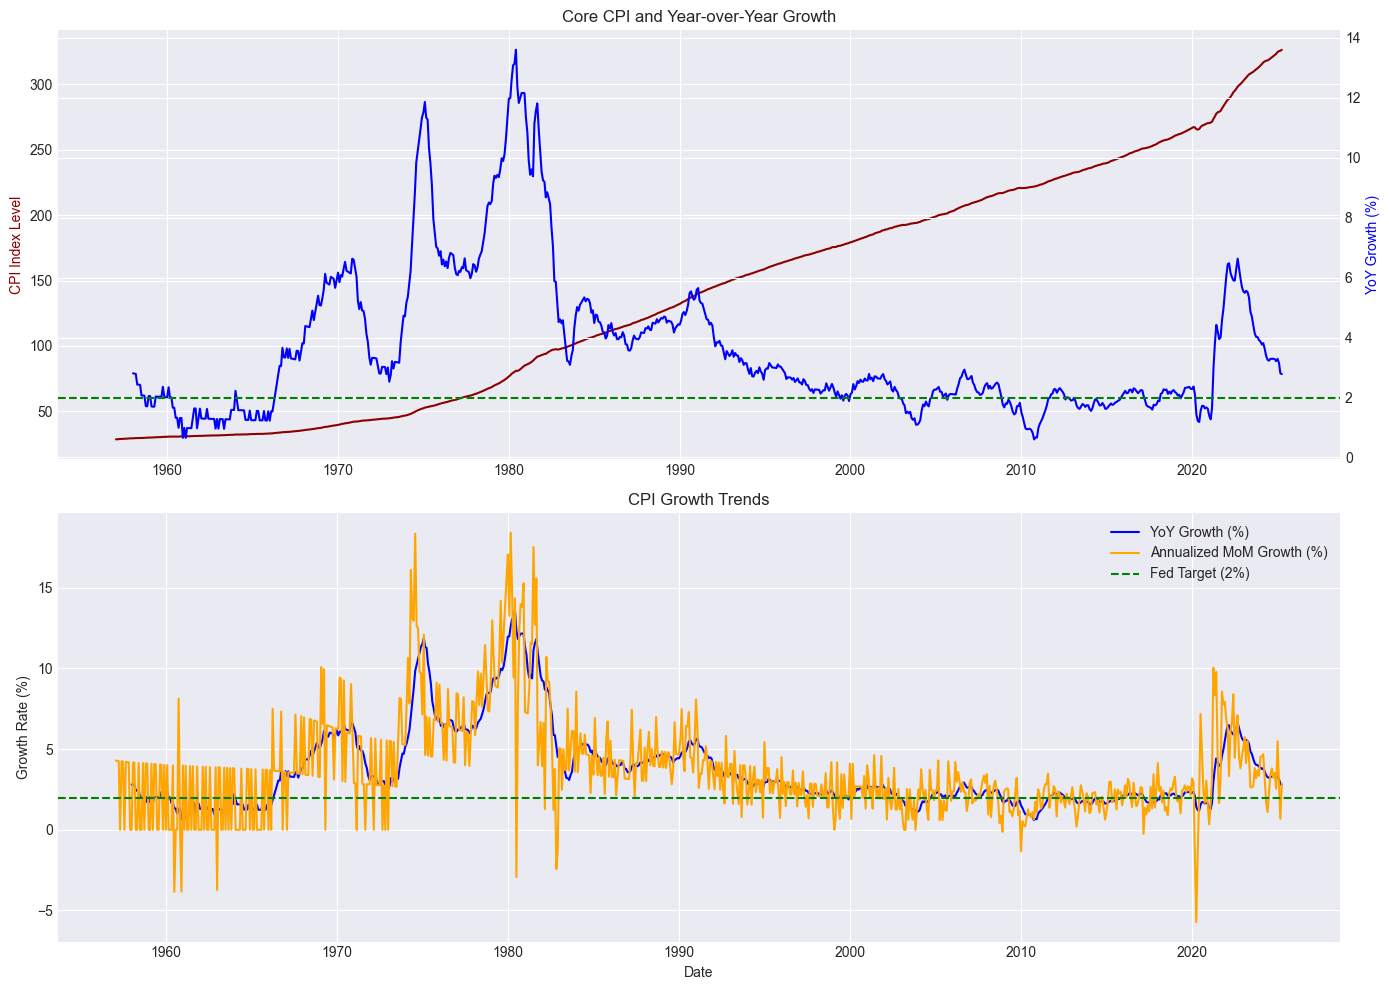

In [49]:
def plot_cpi(df):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

    # --- First Plot: CPI Index and YoY Growth ---
    ax1.plot(df.index, df["core_cpi_index"], color='darkred', label="CPI Index")
    ax1.set_ylabel("CPI Index Level", color='darkred')

    ax1_twin = ax1.twinx()
    ax1_twin.plot(df.index, df["yoy_growth"], color='blue', label="YoY Growth (%)")
    ax1_twin.axhline(2, color='green', linestyle='--', label="Fed Target (2%)")
    ax1_twin.set_ylabel("YoY Growth (%)", color='blue')
    ax1.set_title("Core CPI and Year-over-Year Growth")
    ax1.grid(True)

    # --- Second Plot: YoY vs Annualized MoM Growth ---
    ax2.plot(df.index, df["yoy_growth"], label="YoY Growth (%)", color='blue')
    ax2.plot(df.index, df["mom_annualized"], label="Annualized MoM Growth (%)", color='orange')
    ax2.axhline(2, color='green', linestyle='--', label="Fed Target (2%)")
    ax2.set_title("CPI Growth Trends")
    ax2.set_ylabel("Growth Rate (%)")
    ax2.set_xlabel("Date")
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_cpi(df_cpi)

In [52]:
def summarize_inflation(df, months=12):
    recent = df.tail(months)

    return {
        "Latest CPI": df["core_cpi_index"].iloc[-1],
        "Latest YoY Growth (%)": df["yoy_growth"].iloc[-1],
        "Latest MoM Growth (%)": df["mom_growth"].iloc[-1],
        "Avg YoY Growth (12m)": recent["yoy_growth"].mean(),
        "Volatility YoY (12m)": recent["yoy_growth"].std(),
        "Months Above 2% (YoY)": (recent["yoy_growth"] > 2).sum(),
        "Trend": "Rising" if df["yoy_growth"].iloc[-1] > df["yoy_growth"].iloc[-3] else "Falling"
    }

# Call the summary function
inflation_summary = summarize_inflation(df_cpi)
for key, value in inflation_summary.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}") 

Latest CPI: 326.43
Latest YoY Growth (%): 2.78
Latest MoM Growth (%): 0.24
Avg YoY Growth (12m): 3.19
Volatility YoY (12m): 0.19
Months Above 2% (YoY): 12
Trend: Falling


## 🔍 1.1 Interest rate Overview
____